## Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [2]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    u0=np.ones((row, col))
    v0=np.ones((row, col))
    for i in range(row):
        for j in range(col):
            u0[i][j] = u[i][j] 
            v0[i][j] = v[i][j] 
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j] 
                  vn[i][j] = v[i][j]    
        for i in range(1,row):
            for j in range(1,col):
                u[i][j] = un[i][j] -  u0[i][j]* dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1])
                v[i][j] = vn[i][j] -  v0[i][j]* dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1])
               
        
    return 0

## Numba accelerator

In [3]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    u0=np.ones((row, col))
    v0=np.ones((row, col))
    for i in range(row):
        for j in range(col):
            u0[i][j] = u[i][j] 
            v0[i][j] = v[i][j] 
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j] 
                  vn[i][j] = v[i][j]    
        for i in range(1,row):
            for j in range(1,col):
                u[i][j] = un[i][j] -  u0[i][j]* dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1])
                v[i][j] = vn[i][j] -  v0[i][j]* dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1])
               
    
        
    return 0

## Pyccel accelerator

In [4]:
@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]', 'int', 'float','float', 'float' , 'int')
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    import numpy as np
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    u0=np.ones((row, col))
    v0=np.ones((row, col))
    for i in range(row):
        for j in range(col):
            u0[i][j] = u[i][j] 
            v0[i][j] = v[i][j]
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j] 
                  vn[i][j] = v[i][j]    
        for i in range(1,row):
            for j in range(1,col):
                u[i][j] = un[i][j] -  u0[i][j]* dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1])
                v[i][j] = vn[i][j] -  v0[i][j]* dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1])
               
        
    return 0

## Inputs

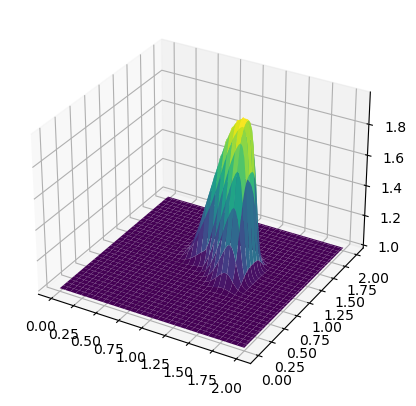

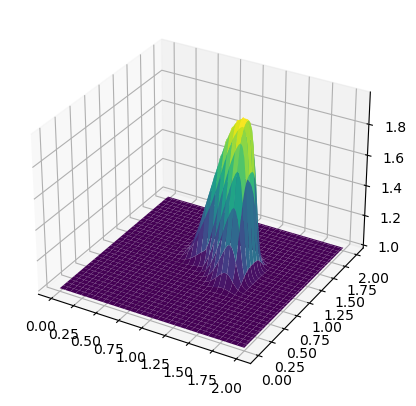

In [5]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [6]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

17.3 s ± 4.59 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [7]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

7.02 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [8]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)


ERROR at Fortran compilation stage


CalledProcessError: Command 'gfortran  -O3 -fPIC  -I"C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__" -c   "C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__\mod_72qz9a7e.f90" -o "C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__\mod_72qz9a7e.o"  -J"C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__"' returned non-zero exit status 1.

In [ ]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)